In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator as mpl_MultipleLocator

from nbmetalog import nbmetalog as nbm
import numpy as np
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
nbm.print_metadata()


context: ci
hostname: fv-az569-896
interpreter: 3.10.12 (main, May 27 2025, 17:12:29) [GCC 11.4.0]
nbcellexec: null
nbname: coverage-criteria-small
nbpath: /home/runner/work/hstrat-surface-concept/hstrat-surface-concept/binder/coverage-criteria-small.ipynb
revision: null
session: 16e0419d-ece3-452c-af47-9b097d1f1315
timestamp: 2025-07-07T20:43:12Z00:00


IPython==7.31.1
keyname==0.6.0
yaml==6.0.2
matplotlib==3.8.3
nbmetalog==0.2.6
numpy==1.23.5
seaborn==0.13.2
teeplot==__version__ = '1.4.2'
re==2.2.1
comm==0.2.2
logging==0.5.1.2
psutil==7.0.0
zmq==27.0.0
json==2.0.9
ipykernel==6.29.5


In [3]:
plt.rcParams.update(
    {
        "figure.figsize": (4 / 1.5, 0.3 / 1.5),
    },
)


In [4]:
def rugplot(
    data: np.ndarray,
    stop: int,
    **kwargs,
) -> plt.Axes:
    ax = sns.rugplot(
        data=data,
        **{
            "color": "green",
            "height": 1.0,
            "linewidth": 1.5,
            **kwargs,
        },
    )
    # ax.xaxis.set_major_locator(mpl_MultipleLocator(16))
    # ax.xaxis.set_minor_locator(mpl_MultipleLocator(8))
    ax.spines[["right", "top", "left"]].set_visible(False)
    ax.set_yticks([])
    ax.set_xlabel("Time ($T$)", labelpad=0)

    sns.rugplot(data=[0, 100], ax=ax, alpha=0.0)
    ax.axvspan(0, stop, facecolor="lime", alpha=0.08, clip_on=False)

    # xlim, ylim = ax.get_xlim(), ax.get_ylim()
    # ax.plot(
    #     [0, stop],
    #     [4, 4],
    #     "-k",
    #     linewidth=1,
    #     marker="|",
    #     markersize=10,
    #     markevery=[0, -1],
    #     clip_on=False,
    # )
    # ax.set_xlim(xlim)
    # ax.set_ylim(ylim)

    ax.set_xticks([0, stop])
    ax.set_xticks(np.arange(0, stop, 5), minor=True)
    ax.set_xticklabels([0, stop])
    ax.tick_params(axis="x", which="major", width=1, length=6)
    ax.tick_params(axis="x", which="minor", width=1, length=3)

    return ax


teeplots/coverage-criteria-small/criterion=steady+stop=50+viz=rugplot+ext=.pdf
teeplots/coverage-criteria-small/criterion=steady+stop=50+viz=rugplot+ext=.png


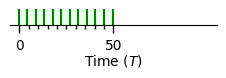

teeplots/coverage-criteria-small/criterion=steady+stop=100+viz=rugplot+ext=.pdf
teeplots/coverage-criteria-small/criterion=steady+stop=100+viz=rugplot+ext=.png


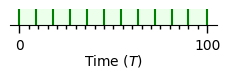

In [5]:
for stop in 50, 100:
    tp.tee(
        rugplot,
        np.linspace(0, stop, 12, endpoint=True, dtype=int),
        stop=stop,
        teeplot_outattrs={
            "criterion": "steady",
            "stop": stop,
        },
        teeplot_subdir="coverage-criteria-small",
    )


teeplots/coverage-criteria-small/criterion=stretched+stop=50+viz=rugplot+ext=.pdf
teeplots/coverage-criteria-small/criterion=stretched+stop=50+viz=rugplot+ext=.png


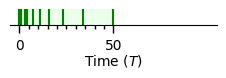

teeplots/coverage-criteria-small/criterion=stretched+stop=100+viz=rugplot+ext=.pdf
teeplots/coverage-criteria-small/criterion=stretched+stop=100+viz=rugplot+ext=.png


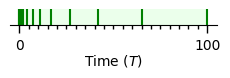

In [6]:
for stop in 50, 100:
    tp.tee(
        rugplot,
        np.geomspace(1, stop + 1, 12, endpoint=True, dtype=int) - 1,
        stop=stop,
        teeplot_outattrs={
            "criterion": "stretched",
            "stop": stop,
        },
        teeplot_subdir="coverage-criteria-small",
    )


teeplots/coverage-criteria-small/criterion=tilted+stop=50+viz=rugplot+ext=.pdf
teeplots/coverage-criteria-small/criterion=tilted+stop=50+viz=rugplot+ext=.png


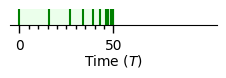

teeplots/coverage-criteria-small/criterion=tilted+stop=100+viz=rugplot+ext=.pdf
teeplots/coverage-criteria-small/criterion=tilted+stop=100+viz=rugplot+ext=.png


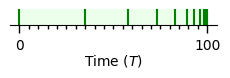

In [7]:
for stop in 50, 100:
    tp.tee(
        rugplot,
        stop + 1 - np.geomspace(1, stop + 1, 12, endpoint=True, dtype=int),
        stop=stop,
        teeplot_outattrs={
            "criterion": "tilted",
            "stop": stop,
        },
        teeplot_subdir="coverage-criteria-small",
    )
